# Introduction

Getting an idea of what the world is looking gives a glimpse to marketers on how to target their products. The same can also be used to find how the world looks forward to various different events.

All search engines have one or the other way to extract the trend analysis, and Google which has [88.14%](https://www.statista.com/statistics/216573/worldwide-market-share-of-search-engines/) of search volume has a public trend analysis tool.


Let's extract the trends for New Year and Christmas for the whole world and dive deeper.

In [17]:
#Importing required libraries for analysis
import numpy as np
import pandas as pd

data_ww_csv = "https://raw.githubusercontent.com/anvsh/Christmas-vs-New_Year/analysis/data/christmas-vs-newyear-worldwide.csv"
data_ww = pd.read_csv(data_ww_csv)
data_ww.columns = ["Date","Christmas","New_Year"]
data_ww.head()

,Date,Christmas,New_Year
0,2004-01,5,16
1,2004-02,2,1
2,2004-03,2,1
3,2004-04,2,1
4,2004-05,2,<1


Google trends data referred above is **normalized non-real time**. This normalization of data allows us to know how popular a search term was compared to all searches on all topics in the particular time period. 

As we can see, New Year is more searched during the first month of the year compared to Christmas. Even though the year has changed, the Christmas cheer doesn't seems to give away completely.

Let's clean the data before we infer further.

In [18]:
print(data_ww.info())
print("New Year Unique Values")
print(data_ww.New_Year.value_counts())
print("\n Christmas Unique Values")
print(data_ww.Christmas.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       204 non-null    object
 1   Christmas  204 non-null    int64 
 2   New_Year   204 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.9+ KB
None
New Year Unique Values
1     124
<1     32
8      10
4       7
5       4
9       4
13      3
3       3
11      3
6       3
7       3
2       3
12      2
14      2
16      1
Name: New_Year, dtype: int64

 Christmas Unique Values
2      85
3      29
5      18
6      13
4       7
11      5
77      4
9       4
10      4
12      4
31      3
39      3
29      2
85      2
40      2
35      2
96      1
95      1
94      1
92      1
7       1
91      1
90      1
80      1
84      1
44      1
30      1
81      1
32      1
37      1
97      1
42      1
100     1
Name: Christmas, dtype: int64


We need to update the values in New Year search trend replacing <1 to 0 and then changing data type of column from *object* to *int64*

Data in Month column is average data for the entire month, and to analyze/visualize it better, I will consider the data as of 15th of each month.

In [19]:
# Replacing search volume <1 to 0
data_ww.replace(to_replace="<1", value="0", inplace = True)

# Changing type of New Year column to int
data_ww = data_ww.astype({"Date":object,"Christmas":int,"New_Year":int})
data_ww.dtypes

Date         object
Christmas     int64
New_Year      int64
dtype: object

In [20]:
data_ww.Date = pd.to_datetime(data_ww.Date+"-15", yearfirst= True)

# Visualize

With data clean and ready, we can go ahead and see the trends of Christmas and New Year searches.

<Figure size 1440x360 with 0 Axes>

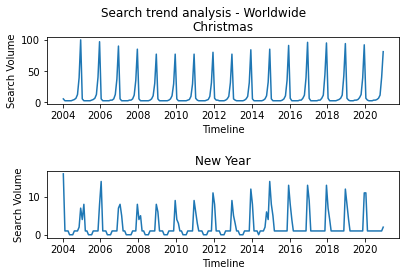

In [127]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))

fig, axs = plt.subplots(nrows = 2)
sns.lineplot(x="Date", y="Christmas", data=data_ww, ax= axs[0])
axs[0].title.set_text("Christmas")
axs[0].set_xlabel("Timeline")
axs[0].set_ylabel("Search Volume")

sns.lineplot(x="Date", y="New_Year", data=data_ww, ax= axs[1])
axs[1].title.set_text("New Year")
axs[1].set_xlabel("Timeline")
axs[1].set_ylabel("Search Volume")

fig.suptitle("Search trend analysis - Worldwide")
plt.tight_layout(pad=2)
#plt.xlabel("Timeline")
#plt.ylabel("Normalized data")
plt.show()

What's interesting to see is that unlike Christmas, New Year doesn't spike as much during the first week of every year. Instead it barely crosses 20% of the search volume.

In [22]:
# Extracting months to analyze month over month trends
data_ww["month_extract"] = pd.DatetimeIndex(data_ww.Date).month

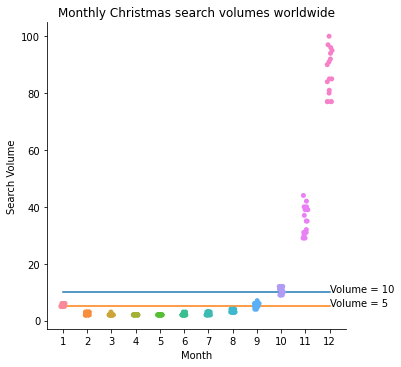

In [98]:
sns.catplot(data=data_ww, y="Christmas", x="month_extract")
max_line = sns.lineplot(data=data_ww, x=np.arange(0,12), y = 10)
min_line = sns.lineplot(data=data_ww, x=np.arange(0,12), y = 5)
max_line.text(11, 10, "Volume = 10", size="medium")
min_line.text(11, 5, "Volume = 5", size="medium")
plt.ylabel("Search Volume")
plt.xlabel("Month")
plt.title("Monthly Christmas search volumes worldwide")
plt.show()

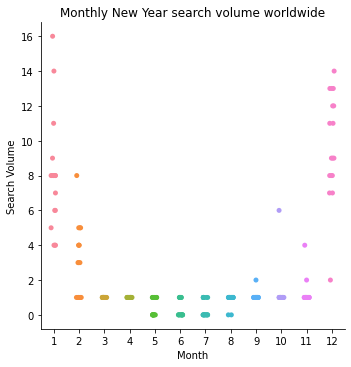

In [99]:
sns.catplot(data=data_ww, y="New_Year", x="month_extract")
plt.xlabel("Month")
plt.ylabel("Search Volume")
plt.title("Monthly New Year search volume worldwide")
plt.show()

In [65]:
max_trend = data_ww[["month_extract","Christmas","New_Year"]].groupby("month_extract").max().reset_index()
mean_trend = data_ww[["month_extract","Christmas","New_Year"]].groupby("month_extract").mean().reset_index()

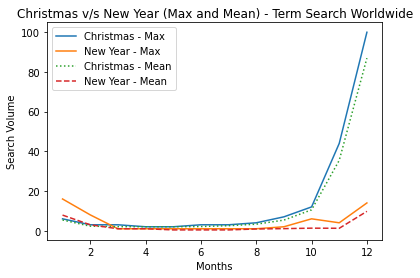

In [95]:
plt.plot(max_trend[["month_extract"]], max_trend[["Christmas"]],linestyle = "-", label="Christmas")
plt.plot(max_trend[["month_extract"]], max_trend[["New_Year"]], linestyle = "-", label="New Year")
plt.plot(mean_trend[["month_extract"]], mean_trend[["Christmas"]],linestyle = ":", label="Christmas")
plt.plot(mean_trend[["month_extract"]], mean_trend[["New_Year"]], linestyle = "--", label="New Year")
plt.legend(["Christmas - Max","New Year - Max","Christmas - Mean", "New Year - Mean"])
plt.xlabel("Months")
plt.ylabel("Search Volume")
plt.title("Christmas v/s New Year (Max and Mean) - Term Search Worldwide")
plt.show()

I am also interested to see if the same trend re-appears for searches done in India

In [121]:
#Loading Indian Trends
data_india_csv = "https://raw.githubusercontent.com/anvsh/Christmas-vs-New_Year/main/data/christmas-vs-newyear-india.csv"
data_india = pd.read_csv(data_india_csv)

#Data Prep and cleaning
data_india.columns = ["extract_month", "Christmas", "New_Year"]
data_india.replace(to_replace = "<1",value=0, inplace = True)
data_india = data_india.astype({"extract_month":"object","Christmas":"int","New_Year":"int"})
data_india["extract_month"] = pd.to_datetime(data_india.extract_month+"-15", yearfirst=True)
data_india["month"] = pd.DatetimeIndex(data_india.extract_month).month
data_india.head()

,extract_month,Christmas,New_Year,month
0,2004-01-15,2,29,1
1,2004-02-15,1,2,2
2,2004-03-15,0,2,3
3,2004-04-15,1,1,4
4,2004-05-15,1,1,5


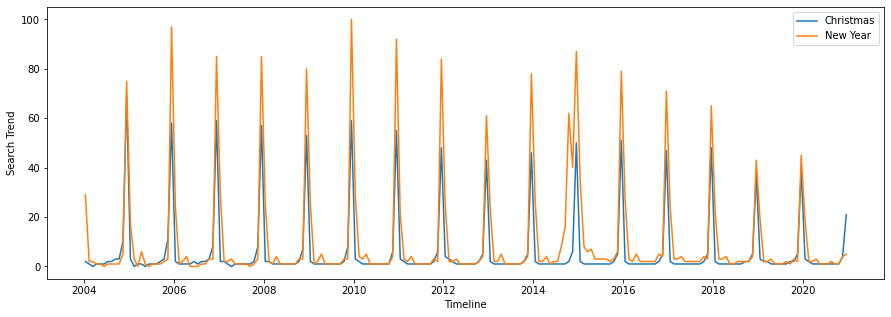

In [142]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data_india, x="extract_month", y="Christmas", label="Christmas")
sns.lineplot(data=data_india, x="extract_month", y="New_Year", label="New Year")
plt.xlabel("Timeline")
plt.ylabel("Search Trend")
plt.show()

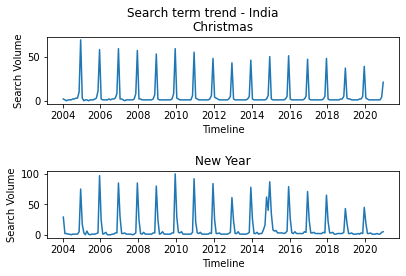

In [136]:
fig, axs = plt.subplots(nrows = 2)

sns.lineplot(data=data_india, x="extract_month", y="Christmas", ax=axs[0])
sns.lineplot(data=data_india, x="extract_month", y="New_Year", ax=axs[1])

axs[0].title.set_text("Christmas")
axs[1].title.set_text("New Year")
axs[0].set_xlabel("Timeline")
axs[1].set_xlabel("Timeline")
axs[0].set_ylabel("Search Volume")
axs[1].set_ylabel("Search Volume")
plt.suptitle("Search term trend - India")
plt.tight_layout(pad=2)
plt.show()

The search trend for India is totaly inverse compared to Worldwide. New Year tends to searched more than Christmas in India. 

Let's take a look how is the max and mean trend month over month for India.

In [144]:
max_trend_in = data_india.groupby("month").max().reset_index()
mean_trend_in = data_india.groupby("month").mean().reset_index()

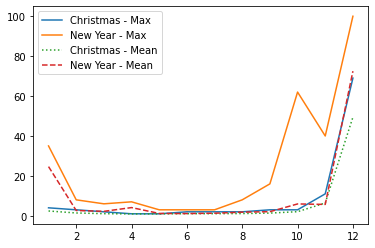

In [147]:
plt.plot(max_trend_in.month, max_trend_in.Christmas, "-")
plt.plot(max_trend_in.month, max_trend_in.New_Year, "-")
plt.plot(mean_trend_in.month, mean_trend_in.Christmas, ":")
plt.plot(mean_trend_in.month, mean_trend_in.New_Year, "--")
plt.legend(["Christmas - Max","New Year - Max","Christmas - Mean", "New Year - Mean"])
plt.title("Christmas v/s New Year (Max and Mean) - Term Search Worldwide")
plt.xlabel("Months")
plt.ylabel("Search Volume")
plt.show()